# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [10]:
# Libraries for data loading, data manipulation and data visulisation
#import *
import numpy as np
import pandas as pd
# Libraries for data preparation and model building
#import *
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import  KFold
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [11]:
df = pd.read_csv('df_train.csv', index_col=0)
test = pd.read_csv('df_test.csv', index_col=0)

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## 3.1. Data Analysis

## 3.2 Feature interactions

In [16]:
#relevant features
features = ['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','Seville_humidity','Madrid_humidity',
           'Bilbao_clouds_all','Bilbao_wind_speed','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_speed',
           'Barcelona_wind_deg','Madrid_clouds_all','Seville_wind_speed', 'Barcelona_rain_1h','Seville_rain_1h',
           'Bilbao_snow_3h','Barcelona_pressure','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h',
           'Madrid_weather_id','Barcelona_weather_id','Bilbao_pressure','Seville_weather_id','Valencia_pressure',
           'Seville_temp_max','Madrid_pressure','Valencia_temp_max','Valencia_temp','Bilbao_weather_id','Seville_temp',
           'Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min',
           'Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp','Madrid_temp_min']

### 3.4.2. Box and Whiskers

Box and whiskers are important in terms of finding the type distribution, skewness and lastly the outlies. 

<AxesSubplot:xlabel='Valencia_pressure'>

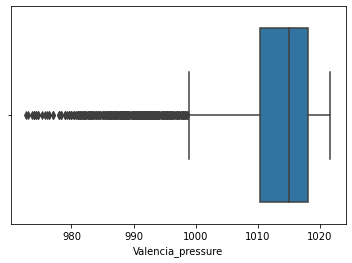

In [19]:
#assesing valencia_pressure box and whiskeres is very important,this is because it contains nulls.
sns.boxplot(x='Valencia_pressure', data=df)

<AxesSubplot:xlabel='load_shortfall_3h'>

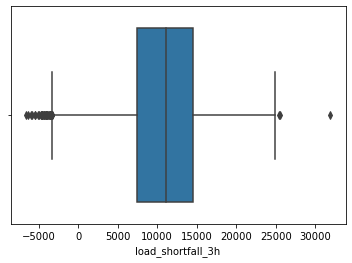

In [20]:
sns.boxplot(x='load_shortfall_3h',data=df) 

the load_shortfall_3h is normally distributed but has presence of outliers. 

In [21]:

df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

there are presence of outlies.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### 4.1. remove missing values/ features

Valencia presure was the only column with null Values (up to 2068 null values). Therefore, the next step is to replace the null values with the median of the Valencia preassure. due to presence of outlies, we cannot replace the nulls with the mean of the datasets.

In [22]:
q = df['Valencia_pressure'].median()
df.copy()
df['Valencia_pressure'].fillna(value=q, inplace=True)
df.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

<AxesSubplot:xlabel='Valencia_pressure'>

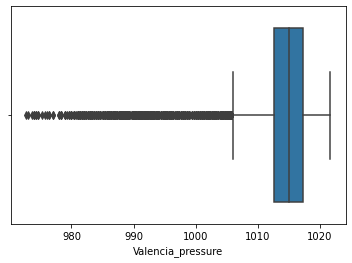

In [23]:
#box and whiskers diagram for Valencia_pressure after replacing the null velues with a median
sns.boxplot(x='Valencia_pressure', data=df)

### 4.2. create new features

In this section, all columns that have a object data type will be cleaned and replaced with numerical datatype. See section 3.1 under info. the columns with with object data type are time, Valencia_wind_deg abd Seville_pressure

In [24]:
#the following method is used when changing categorical value to numerical values (for only ordinal variables).
data_mapping = {'level_1':1,'level_2':2,'level_3':3,'level_4':4,'level_5':5,'level_6':6,'level_7':7,'level_8':8,
               'level_9':9,'level_10':10} #create a dictionary
df['Valencia_wind_deg_num'] = df['Valencia_wind_deg'].map(data_mapping) #replace category with an value

#repeat the above step for the Seville pressure column
dataMapping = {'sp1':1, 'sp2':2, 'sp3':3, 'sp4':4, 'sp5':5, 'sp6':6, 'sp7':7, 'sp8':8, 'sp9':9, 'sp10':10,
             'sp11':11, 'sp12':12, 'sp13':13, 'sp14':14, 'sp15':15, 'sp16':16, 'sp17':17, 'sp18':18, 'sp19':19, 
             'sp20':20, 'sp21':21, 'sp22':22, 'sp23':23, 'sp24':24, 'sp25':25} 
df['Seville_pressure_num'] = df['Seville_pressure'].map(dataMapping)

Thereafter, Original columns, Valencia_wind_deg and Seville_pressure should be dropped or deleted, to ensure that the table should remain with numerical columns.


In [25]:
#df.drop(columns = ['Valencia_wind_deg', 'Seville_pressure'])
del df['Valencia_wind_deg']
del df['Seville_pressure']

In [26]:
#separate datetime to different columns with integer datatype
df['time']=pd.to_datetime(df['time'], infer_datetime_format=True) 
df['time']= pd.to_numeric(df['time'].dt.strftime("%Y%m%d%H%M%S"))


### 4.3. engineer existing features

#### 4.3.1. filter features by variance

this is important because, features with low variance should be eliminated. features with low variance mean that there is no vaiety in their data sets, this means that they do not change much. features with a low varience close to 0 will be dropped.

In [27]:
# asses the variance of the features
df.var()

time                     6.670737e+19
Madrid_wind_speed        3.423872e+00
Bilbao_rain_1h           1.405505e-01
Valencia_wind_speed      5.813836e+00
Seville_humidity         5.117198e+02
Madrid_humidity          5.922115e+02
Bilbao_clouds_all        1.059570e+03
Bilbao_wind_speed        2.876035e+00
Seville_clouds_all       5.891534e+02
Bilbao_wind_deg          1.041549e+04
Barcelona_wind_speed     3.211971e+00
Barcelona_wind_deg       7.934772e+03
Madrid_clouds_all        7.870078e+02
Seville_wind_speed       2.798577e+00
Barcelona_rain_1h        4.028816e-01
Seville_rain_1h          3.092559e-02
Bilbao_snow_3h           3.105437e-01
Barcelona_pressure       1.980533e+08
Seville_rain_3h          1.339246e-05
Madrid_rain_1h           2.329857e-02
Barcelona_rain_3h        1.595465e-05
Valencia_snow_3h         1.407964e-04
Madrid_weather_id        5.977349e+03
Barcelona_weather_id     7.769054e+03
Bilbao_pressure          1.009246e+02
Seville_weather_id       5.175365e+03
Valencia_pre

In [28]:
df.drop(columns = ['Bilbao_rain_1h','Seville_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h','Barcelona_rain_3h',
                   'Valencia_snow_3h',  ])

,time,Madrid_wind_speed,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Valencia_wind_deg_num,Seville_pressure_num
0,20150101030000,0.666667,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,...,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,5,25
1,20150101060000,0.333333,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,...,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,10,25
2,20150101090000,1.000000,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,...,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9,25
3,20150101120000,1.000000,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,...,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,8,25
4,20150101150000,1.000000,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,...,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,20171231090000,1.000000,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,...,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333,6,23
8759,20171231120000,5.000000,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,...,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667,6,23
8760,20171231150000,6.333333,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,...,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000,9,22
8761,20171231180000,7.333333,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,...,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000,8,23


### 4.3.2. filter features by correlation

From the above code, there wont be any features deleted because all have same RMSE values r squared of 0

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [34]:
# split data
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3332, random_state=50) #33% test size to ensure we test only 2920 as requested on kaggle

## 5.2. create ML models
### 5.2.1 Linear Regression Model

### 5.2.2. Decision tree

In [45]:
#initiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=8,random_state=100)

In [56]:
 #fit and train the model
 regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=100)

In [54]:
y_trained = regr_tree.predict(X_train)

In [48]:
# get predictions for test data
y_pred_dt = regr_tree.predict(X_test)

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_dt)))


RMSE: 4733.528783728158


In [49]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('R_squared:', metrics.r2_score(y_test, y_pred_dt))

Testing:
MSE: 22406294.74638297
R_squared: 0.1953391083083319


In [50]:
importance_dec=regr_tree.feature_importances_
cof = pd.Series(importance_dec, X_train.columns)
cof

time                     0.421798
Madrid_wind_speed        0.025610
Bilbao_rain_1h           0.000732
Valencia_wind_speed      0.011610
Seville_humidity         0.024071
Madrid_humidity          0.010822
Bilbao_clouds_all        0.016970
Bilbao_wind_speed        0.003690
Seville_clouds_all       0.016666
Bilbao_wind_deg          0.022032
Barcelona_wind_speed     0.000708
Barcelona_wind_deg       0.013271
Madrid_clouds_all        0.012544
Seville_wind_speed       0.008070
Barcelona_rain_1h        0.000000
Seville_rain_1h          0.006245
Bilbao_snow_3h           0.000000
Barcelona_pressure       0.053126
Seville_rain_3h          0.000000
Madrid_rain_1h           0.002170
Barcelona_rain_3h        0.000000
Valencia_snow_3h         0.000000
Madrid_weather_id        0.012738
Barcelona_weather_id     0.001223
Bilbao_pressure          0.022222
Seville_weather_id       0.011945
Valencia_pressure        0.036701
Seville_temp_max         0.007209
Madrid_pressure          0.011887
Valencia_temp_

<AxesSubplot:>

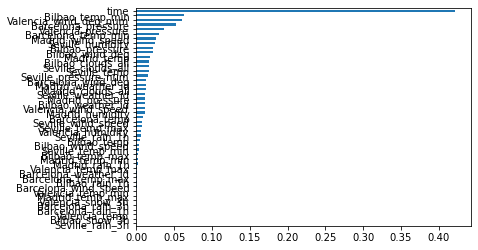

In [51]:
#explain
%matplotlib inline
cof.sort_values().plot.barh()

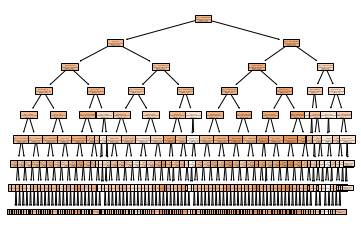

<Figure size 108000x122400 with 0 Axes>

In [58]:
plot_tree(regr_tree, filled=True)
#classifier = DecisionTreeClassifier()
#classifier.fit(X_train, y_train)

plt.figure(figsize=(1500, 1700)) # Resize figure
#plot_tree(classifier, filled=True)
plt.show()

In [60]:
#prediction table for decision tree

decision = test[['time']]
decision['load_shortfall_3h']=y_pred_dt
decision

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,12639.330336
8764,2018-01-01 03:00:00,10595.737089
8765,2018-01-01 06:00:00,9828.035088
8766,2018-01-01 09:00:00,15202.155303
8767,2018-01-01 12:00:00,12663.056441
...,...,...
11678,2018-12-31 09:00:00,12458.969649
11679,2018-12-31 12:00:00,12458.969649
11680,2018-12-31 15:00:00,12112.195076
11681,2018-12-31 18:00:00,10234.299639


### 5.2.4. RIDGE model

In [62]:
# Create ridge model
ridge = Ridge()

In [63]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [64]:
test_ridge = ridge.predict(X_test)

print('Testing MSE')

print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Ridge : 23789039.03499824


In [65]:
print("Testing:")

print('R_squared:', metrics.r2_score(y_test, test_ridge))

Testing:
R_squared: 0.14568162299660548


In [66]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_ridge)))

RMSE: 4877.40084830007


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---